In [1]:
import pandas as pd
from pyaugsynth import Dataprep, Synth

In [2]:
df = pd.read_csv('smoking.csv')

dataprep = Dataprep(
    foo=df,
    predictors=('lnincome', 'beer', 'age15to24', 'retprice'),
    predictors_op='mean',
    time_predictors_prior=range(1970, 1989),
    special_predictors=(
        ('lnincome', range(1980, 1989) ,'mean'),
        ('retprice', range(1980, 1989), 'mean'),
        ('age15to24', range(1980, 1989), 'mean'),
        ('beer', range(1984, 1989), 'mean'),
        ('cigsale', [1975], 'mean'),
        ('cigsale', [1980], 'mean'),
        ('cigsale', [1988], 'mean')
    ),
    dependent = 'cigsale',
    unit_variable = 'state',
    time_variable = 'year',
    treatment_identifier = 'California',
    controls_identifier = ('Alabama', 'Arkansas', 'Colorado', 'Connecticut',
        'Delaware', 'Georgia', 'Idaho', 'Illinois', 'Indiana',
        'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
        'Minnesota', 'Mississippi', 'Missouri', 'Montana',
        'Nebraska', 'Nevada', 'New Hampshire', 'New Mexico',
        'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
        'Pennsylvania', 'Rhode Island', 'South Carolina',
        'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
        'Virginia', 'West Virginia', 'Wisconsin', 'Wyoming'),
    time_optimize_ssr = range(1970, 1989)
)

synth = Synth()
synth.fit(dataprep=dataprep, optim_method='COBYLA', optim_initial='equal')

In [3]:
synth.weights(threshold=0.0001)

Colorado       0.162
Connecticut    0.089
Montana        0.203
Nevada         0.206
Texas          0.025
Utah           0.315
Name: weights, dtype: float64

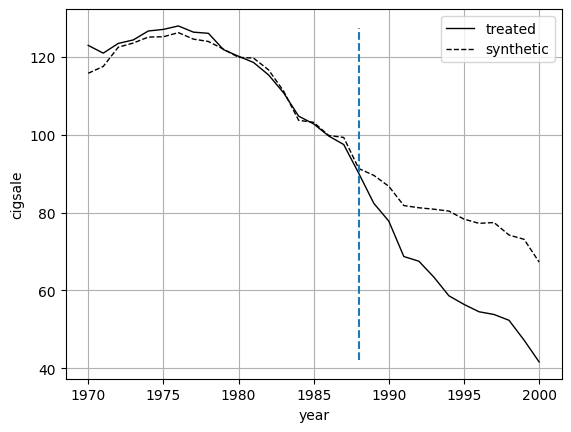

In [4]:
synth.path_plot(treatment_time=1988)

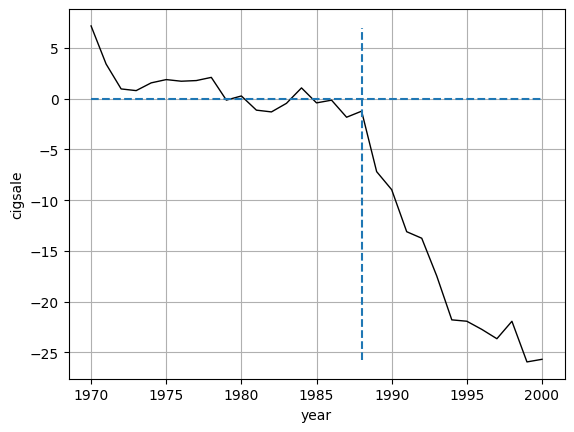

In [5]:
synth.gaps_plot(treatment_time=1988)

In [6]:
synth.summary()

,V,treated,synthetic,sample mean
lnincome,0.002,10.032,9.838,9.792
beer,0.010,24.280,24.110,23.655
age15to24,0.015,0.179,0.181,0.178
retprice,0.004,66.637,65.549,64.505
special.1.lnincome,0.001,10.077,9.865,9.829
special.2.retprice,0.004,89.422,89.663,87.266
special.3.age15to24,0.297,0.174,0.173,0.173
special.4.beer,0.034,24.280,24.110,23.655
special.5.cigsale,0.113,127.100,125.212,136.932
special.6.cigsale,0.238,120.200,119.926,138.089
